In [37]:
#load data and keep the useful cols
import urllib.request  # the lib that handles the url stuff
import pandas as pd
import base64
target_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
x = urllib.request.urlopen(target_url) #as http response type
data = x.read().decode('utf-8')        #to byte, then to string
print(data,  file=open('C:con19.txt', 'w'))    #save string file
df = pd.read_csv (r'C:con19.txt')              #load txt file, to csv
df.to_csv (r'C:con19.csv', index=None)
print(df.columns)  

#only keep location,date,total_cases,total_deaths,case per million, death per million as useful cols
df.drop(df.columns[[0,8,10,11,12,13,14,15]], axis=1, inplace=True)
print('Dataset shape:',df.shape)
df.head()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')
Dataset shape: (24742, 26)


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [38]:
from datetime import datetime
from datetime import timedelta

df['date']= df['date'].astype('datetime64[ns]')
oldestdate = min(df['date'])
newestdate = max(df['date'])
df['days'] = (df['date'] - oldestdate).dt.days
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,days
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,1
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,2
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,3
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,4


In [39]:
# #check null value and drop it

# countnull = (df['location'].isnull().values.sum(),df['date'].isnull().values.sum(),df['total_cases'].isnull().values.sum(),df['total_deaths'].isnull().values.sum())
# print('Count of null values in each col:(loc,date,totcase,totdeath)=',countnull)
# #there isn't any null values
# #if there is, drop the row 
# if sum(countnull) != 0:
#   print('There detected null data: the rows are removed and data file is updated.')
#   df = df.dropna(axis=0)
# print('Dataset shape:',df.shape)
df.to_csv(r'211countrydata.csv', index = False)
numdate = df['date'].nunique()
numcountry = df['location'].nunique()
print("The cleaned dataset gives total cases and deaths confirmed during  {} days in {} countries.".format(numdate,numcountry))
print("The records are from {} to {}".format(oldestdate,newestdate))

The cleaned dataset gives total cases and deaths confirmed during  173 days in 208 countries.
The records are from 2019-12-31 00:00:00 to 2020-06-20 00:00:00


In [40]:
#filter to pick five counties with most cases(online search)
selected_country = ['Spain','United States','Italy','India','United Kingdom']
df_five = df[df.location.isin(selected_country)]
df_five.to_csv(r'fivecountrydata.csv', index =True)
df_five


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,days
10427,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.000,NaN,NaN,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0
10428,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.000,NaN,NaN,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,1
10429,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.000,NaN,NaN,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,2
10430,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.000,NaN,NaN,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,3
10431,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.000,NaN,NaN,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23697,North America,United States,2020-06-16,2114026.0,19957.0,116127.0,395.0,60.293,481920.0,1.456,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,168
23698,North America,United States,2020-06-17,2137731.0,23705.0,116963.0,836.0,71.616,491329.0,1.484,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,169
23699,North America,United States,2020-06-18,2163290.0,25559.0,117717.0,754.0,77.217,493829.0,1.492,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,170
23700,North America,United States,2020-06-19,2191052.0,27762.0,118434.0,717.0,83.872,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,171


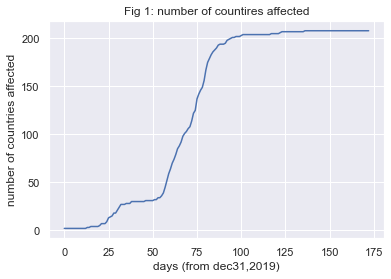

In [41]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set()
import numpy as np


# Fig 1: count of affected countries 

x= range(numdate)
y= []  #count of affected countries
c= []  #list of affected countries
for day in x:
  affected_df = df[df['days'] == day]
  affected_df = affected_df[affected_df['total_cases']!=0]  #the df of data on selected date and has total_cases recorded
  c=set(affected_df['location'].unique()).union(set(c)) #add countries who has already affected: avoid effects of missing data
  y.append(len(c))
plt.xlabel('days (from dec31,2019)')
plt.ylabel('number of countries affected')
plt.title('Fig 1: number of countires affected')
plt.plot(x,y)
plt.show()

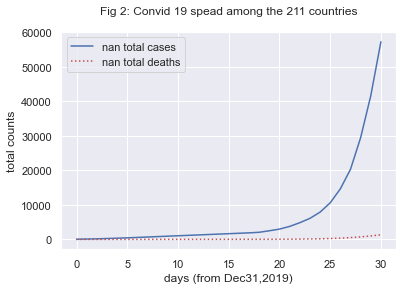

In [42]:
# Fig 2: total cases and deaths

x= range(numdate)
y1= []  #sum of cases
y2= []  #sum of deaths
sum1 = 0
sum2 = 0

for day in x:
  affected_df = df[df['days'] == day]
  sum1 = sum1 + sum(affected_df['total_cases'])  
  sum2 = sum2 + sum(affected_df['total_deaths'])
  y1.append(sum1)
  y2.append(sum2)


plt.xlabel('days (from Dec31,2019)')
plt.ylabel('total counts')
plt.title('Fig 2: Convid 19 spead among the 211 countries\n')

plt.plot(x, y1, 'b-',label ='{} total cases'.format(f"{y1[-1]:,}"))
plt.plot(x, y2,'r:',label = '{} total deaths'.format(f"{y2[-1]:,}"))
plt.legend()
plt.show()


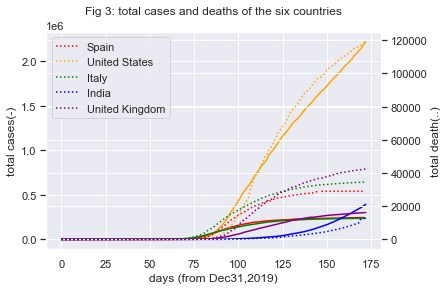

In [43]:

# Fig 3: scatter plot of the five countries
fig3, ax1 = plt.subplots()
ax1.set_xlabel('days (from Dec31,2019)')
ax1.set_ylabel('total cases(-)')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('total death(..)')  # we already handled the x-label with ax1
plt.title('Fig 3: total cases and deaths of the six countries\n')

colors = ['red','orange','green','blue','purple']
for i in range(len(selected_country)):
  df_i = df_five[df_five['location'] == selected_country[i]] #data of a country
  x= df_i['days']
  y1=df_i['total_cases']
  y2=df_i['total_deaths']
  ax1.plot(x, y1, color = colors[i])
  ax2.plot(x, y2,':',color = colors[i],label = selected_country[i])
  plt.legend()
plt.show()